# Introduction

This is my first work of machine learning.

- Origin data called: `train_df_org`, `test_df_org`
- Processing data called: `train_df`, `test_df`, `full_df`
- Data after clean called: `train_df_clean`, `test_df_clean`
- Train data will be splitted 2 set called : `train_df_train`, `train_df_test` 
- Data value called: `train_df_val`, `test_df_val`


# Preparing dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

# Visaulization
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
train_df_org = pd.read_csv('../input/train.csv', header = 0)
test_df_org = pd.read_csv('../input/test.csv' , header = 0)
# Tmp data
train_df = train_df_org.copy()
test_df  = test_df_org.copy()
full_df = [train_df, test_df]

# Function to calculate no. of null values with percentage in the dataframe
def null_values(data):    
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

null_values(train_df)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [2]:
### Train dataset info

In [3]:
print('Len: ', len(train_df))
train_df.head()

Len:  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Test dataset info

In [5]:
print('Len: ', len(test_df))
test_df.head()

Len:  418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Correlation

In [7]:
## get the most important variables. 
corr = train_df.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Pclass         0.114569
Fare           0.066207
Parch          0.006663
Age            0.005963
SibSp          0.001248
PassengerId    0.000025
Name: Survived, dtype: float64

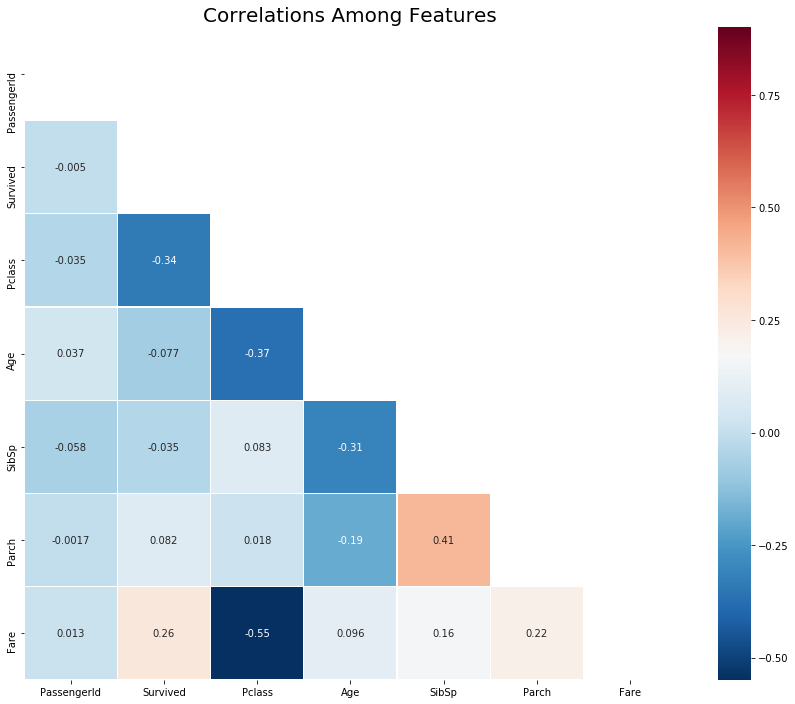

In [8]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plot
plt.subplots(figsize = (15,12))
sns.heatmap(train_df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

# Feature statistics

In [9]:
# Continuous Data Plot
def cont_plot(df, feature_name, target_name, palettemap, hue_order, feature_scale): 
    df['Counts'] = "" # A trick to skip using an axis (either x or y) on splitting violinplot
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[feature_name], ax=axis0);
    sns.violinplot(x=feature_name, y="Counts", hue=target_name, hue_order=hue_order, data=df,
                   palette=palettemap, split=True, orient='h', ax=axis1)
    axis1.set_xticks(feature_scale)
    plt.show()
    # WARNING: This will leave Counts column in dataset if you continues to use this dataset

# Categorical/Ordinal Data Plot
def cat_plot(df, feature_name, target_name, palettemap): 
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    df[feature_name].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
    sns.countplot(x=feature_name, hue=target_name, data=df,
                  palette=palettemap,ax=axis1)
    plt.show()

# Color map for visualization
survival_palette = {0: "black", 1: "orange"} 

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


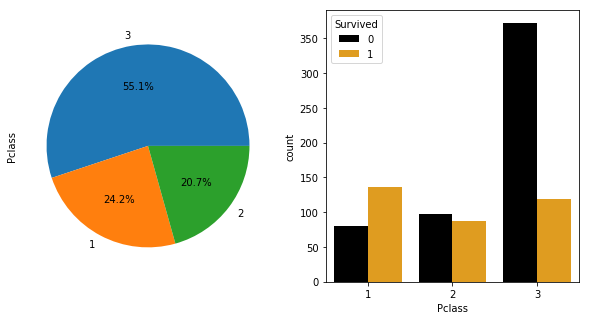

In [10]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cat_plot(train_df, 'Pclass','Survived', survival_palette)

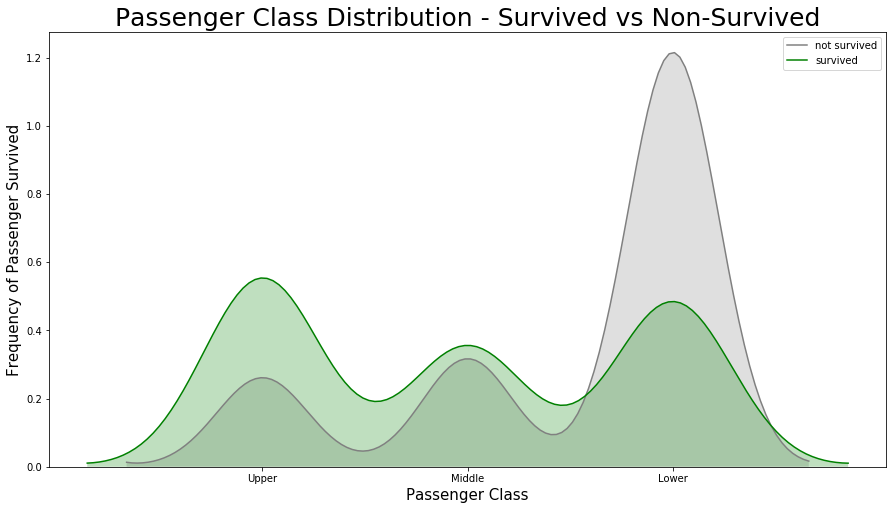

In [11]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train_df.Pclass[train_df.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train_df.Pclass.unique()), labels);

      Sex  Survived
0  female  0.742038
1    male  0.188908


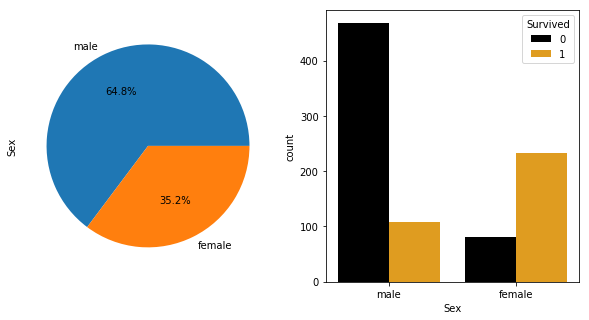

In [12]:
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cat_plot(train_df, 'Sex','Survived', survival_palette)

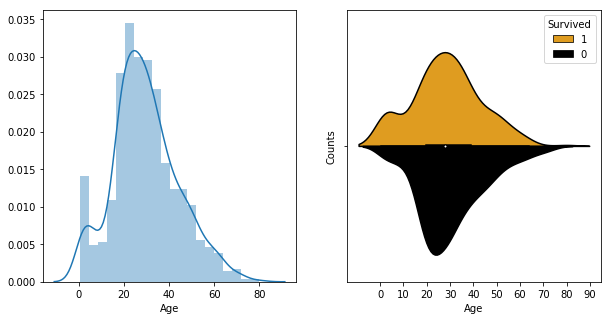

In [13]:
age_set_nonan = train_df[['Age','Survived']].copy().dropna(axis=0)
cont_plot(age_set_nonan, 'Age', 'Survived', survival_palette, [1, 0], range(0,100,10))

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


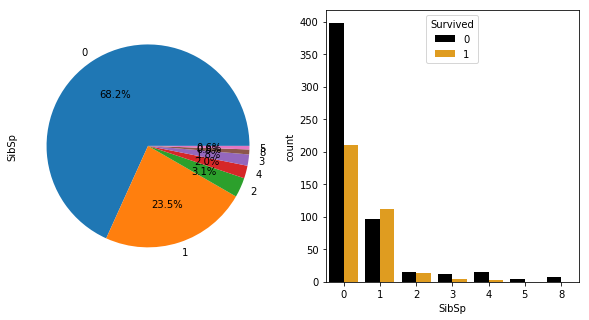

In [14]:
print(train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cat_plot(train_df, 'SibSp','Survived', survival_palette)

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


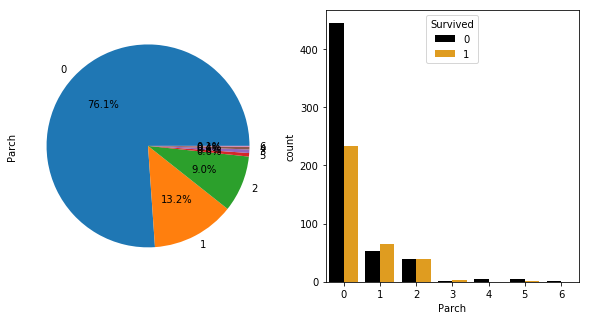

In [15]:
print(train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cat_plot(train_df, 'Parch','Survived', survival_palette)

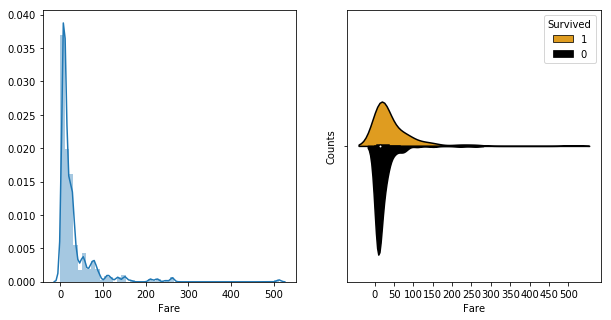

In [16]:
# Copy dataframe so method won't leave Counts column in train_df
fare_set = train_df[['Fare','Survived']].copy()
cont_plot(fare_set, 'Fare', 'Survived', survival_palette, [1, 0], range(0,550,50))

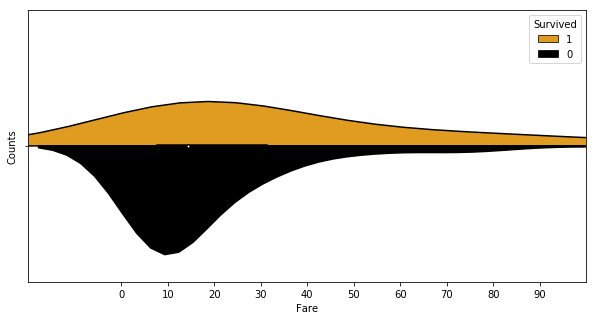

In [17]:
# Fare zoom-in to check
fare_set_mod = train_df[['Fare','Survived']].copy()
fare_set_mod['Counts'] = "" 
fig, axis = plt.subplots(1,1,figsize=(10,5))
sns.violinplot(x='Fare', y="Counts", hue='Survived', hue_order=[1, 0], data=fare_set_mod,
               palette=survival_palette, split=True, orient='h', ax=axis)
axis.set_xticks(range(0,100,10))
axis.set_xlim(-20,100)
plt.show()

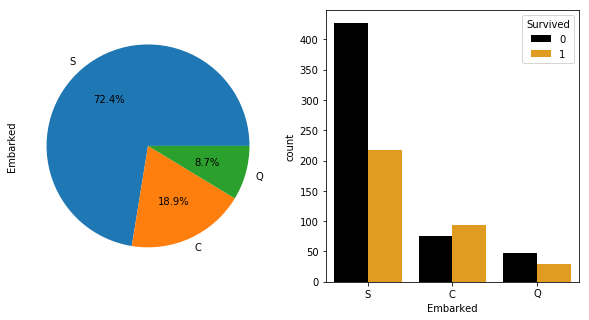

In [18]:
emb_set_nonan = train_df[['Embarked','Survived']].copy().dropna(axis=0)
cat_plot(train_df, 'Embarked','Survived', survival_palette)

# Preprocess data

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Data cleaning

In [20]:
# SibSp and Parch
"""
With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.
"""
for dataset in full_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


In [21]:
"""
It seems has a good effect on our prediction but let's go further and categorize people to check whether they are alone in this ship or not.
"""
for dataset in full_df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [22]:
# Embarked
"""
The embarked feature has some missing value. and we try to fill those with the most occurred value ( 'S' ).
"""
for dataset in full_df:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [23]:
# Cabin
"""
Separate cabin to 0 for NaN, otherwise to 1
"""
for dataset in full_df:
#     dataset['Cabin'][pd.notna(dataset['Cabin'])] = 1
#     dataset['Cabin'] = dataset['Cabin'].fillna(0)
#     or
    dataset['Cabin'] = dataset['Cabin'].notnull().astype(int)
print (train_df[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean())

   Cabin  Survived
0      0  0.299854
1      1  0.666667


In [24]:
# Fare
"""
Fare also has some missing value and we will replace it with the median. then we categorize it into 4 ranges.
"""
for dataset in full_df:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [25]:
# Title
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_df:
    dataset['Title'] = dataset['Name'].apply(get_title)

pd.crosstab(train_df['Title'], train_df['Sex'])

for dataset in full_df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


    Title        Age
0  Master   4.574167
1    Miss  21.845638
2      Mr  32.368090
3     Mrs  35.788991
4    Rare  45.545455


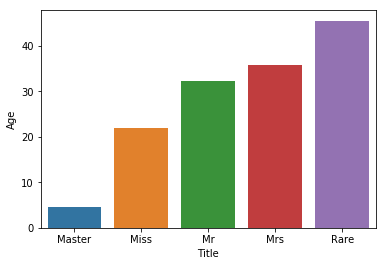

In [26]:
Mean_Age = train_df[['Title','Age']].groupby(['Title'],as_index = False).mean().sort_values(by='Age')
sns.barplot(x='Title', y='Age', data=Mean_Age)
print(Mean_Age)

In [27]:
# Age
# for dataset in full_df:
#     age_avg 	   = dataset['Age'].mean()
#     age_std 	   = dataset['Age'].std()
#     age_null_count = dataset['Age'].isnull().sum()
    
#     age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
#     dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
#     dataset['Age'] = dataset['Age'].astype(int)

for dataset in full_df:
    dataset['Age'] = dataset['Age'].fillna(-1)
    
for dataset in full_df:
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Master'), 'Age'] = 4.57
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Miss'), 'Age'] = 21.84
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Mr'), 'Age'] = 32.36
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Mrs'), 'Age'] = 35.78
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Rare'), 'Age'] = 45.54
    dataset['Age'] = dataset['Age'].astype(int)   

train_df['CategoricalAge'] = pd.cut(train_df['Age'], 5)

print (train_df[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.548077
1   (16.0, 32.0]  0.328032
2   (32.0, 48.0]  0.436275
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [28]:
for dataset in full_df:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 2

    
# # Normalized
# for dataset in full_df:
#     for col in ['Pclass', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title', 'Sex']:
#         dataset[col] = StandardScaler().fit_transform(dataset[col].astype(float).values.reshape(-1, 1))
        
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CategoricalFare,Title,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,0,0,2,0,"(-0.001, 7.91]",1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,1,1,2,0,"(31.0, 512.329]",3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,0,0,1,1,"(7.91, 14.454]",2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,1,0,2,0,"(31.0, 512.329]",3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,0,0,1,1,"(7.91, 14.454]",1,"(32.0, 48.0]"


# Outlier detection

In [29]:
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import lightgbm as lgb

def get_feature_importances(data):
    data = data.copy()
    target_col_name = 'Survived'
    not_features = [target_col_name, 'PassengerId']
    # Gather real features
    valid_data_feature = data.select_dtypes(exclude=['object', 'category'])
    train_features = [f for f in valid_data_feature if f not in not_features]
    # Go over fold and keep track of CV score (train and valid) and feature importances
    y = data[target_col_name].copy()
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(data[train_features], y, free_raw_data=False, silent=True)
    lgb_params = {
        'max_depth': 10,
        'n_jobs': 5
    }
    
    # Fit the model
    clf = lgb.train(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=500)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(data[train_features]))
    
    return imp_df

# Get the actual importance
actual_imp_df2 = get_feature_importances(data=train_df).sort_values(by='importance_gain', ascending=False)
actual_imp_df2.head(20)

/Volumes/Soft/_Program_Files/python/ml3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


,feature,importance_gain,importance_split,trn_score
10,Title,389.600217,1213,0.950812
0,Pclass,93.894535,1305,0.950812
8,FamilySize,72.849885,1052,0.950812
5,Fare,46.300006,2155,0.950812
2,Age,40.331674,2110,0.950812
6,Cabin,32.506196,648,0.950812
7,Embarked,21.907364,1560,0.950812
1,Sex,16.859242,1090,0.950812
3,SibSp,16.575063,966,0.950812
4,Parch,8.240017,527,0.950812


## Feature selection

In [30]:
"Before", train_df.shape, test_df.shape, full_df[0].shape, full_df[1].shape

('Before', (891, 17), (418, 14), (891, 17), (418, 14))

In [31]:
# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'IsAlone', 'Parch', 'SibSp', 'Embarked']
train_df_clean = train_df.drop(drop_elements, axis = 1)
train_df_clean = train_df_clean.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test_df_clean  = test_df.drop(drop_elements, axis = 1)

train_df_val = train_df_clean.values
test_df_val  = test_df_clean.values

# output
train_df_clean.head()


,Survived,Pclass,Sex,Age,Fare,Cabin,FamilySize,Title
0,0,3,1,1,0,0,2,1
1,1,1,0,2,3,1,2,3
2,1,3,0,1,1,0,1,2
3,1,1,0,2,3,1,2,3
4,0,3,1,2,1,0,1,1


In [32]:
"After", train_df_clean.shape, test_df_clean.shape, full_df[0].shape, full_df[1].shape

('After', (891, 8), (418, 7), (891, 17), (418, 14))

In [33]:
# Get the actual importance, i.e. without shuffling
actual_imp_df = get_feature_importances(data=train_df_clean).sort_values(by='importance_gain', ascending=False)
actual_imp_df.head(20)

,feature,importance_gain,importance_split,trn_score
6,Title,386.670923,1223,0.936418
0,Pclass,90.480847,1511,0.936418
5,FamilySize,86.762885,2268,0.936418
3,Fare,43.444381,2490,0.936418
2,Age,36.757185,2339,0.936418
4,Cabin,30.318964,729,0.936418
1,Sex,12.117599,1061,0.936418


# Machine learning

Now we are ready to train a model and predict the required solution.

- KNN or k-Nearest Neighbors
- Support Vector Machines
- Decision Tree Classifier
- Random Forest Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier
- Naive Bayes Classifier
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- Logistic Regession
- Perceptron
- Stochastic Gradient Descent

                            Model     Score
4          RandomForestClassifier  0.840000
6      GradientBoostingClassifier  0.837778
1                             SVC  0.836667
13                 LGBMClassifier  0.831111
3          DecisionTreeClassifier  0.824444
5              AdaBoostClassifier  0.822222
10             LogisticRegression  0.812222
9   QuadraticDiscriminantAnalysis  0.801111
2                       LinearSVC  0.800000
8      LinearDiscriminantAnalysis  0.800000
7                      GaussianNB  0.778889
0            KNeighborsClassifier  0.761111
11                     Perceptron  0.753333
12                  SGDClassifier  0.715556


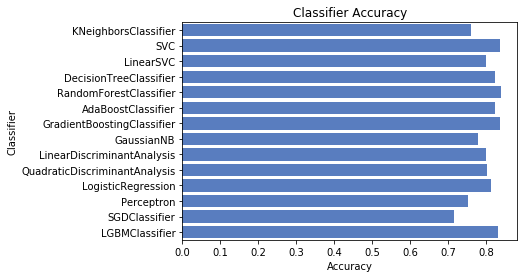

In [34]:
# Evaluation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
# Classifier (machine learning algorithm) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(max_iter=10000, kernel='rbf', gamma=0.7, C=1.0),
    LinearSVC(max_iter=10000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    Perceptron(max_iter=100),
    SGDClassifier(),
    LGBMClassifier()
]

log_cols = ["Classifier", "Accuracy"]
log      = pd.DataFrame(columns=log_cols)

# Config data for classifiers
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_df_val[0::, 1::]
Y = train_df_val[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, Y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(Y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

# Show plot
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

# Print score
models_score = pd.DataFrame({
    'Model': list(acc_dict.keys()),
    'Score': list(acc_dict.values())}).sort_values(by='Score', ascending=False)
print(models_score)


**Select candidate model**

In [35]:
candidate_classifier = classifiers[models_score.head(1).index[0]]
print('Candidate classifier: ', candidate_classifier)

Candidate classifier:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


# Prediction

In [36]:
candidate_classifier.fit(X, Y)
predict_res = candidate_classifier.predict(test_df_clean).astype(int)

print('Predic finish.', predict_res.shape)

Predic finish. (418,)


# Export submission

In [37]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predict_res
    })
print(submission.head())
submission.to_csv('../output/export_submission.csv', index=False)


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         0
